In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from  sklearn.preprocessing import StandardScaler, PolynomialFeatures	# StandardScaler 将特征正则化；PolynomialFeatures 用于生成多项式的、互动的特征数据
from sklearn.linear_model import LogisticRegression
from  sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import  matplotlib as mpl
import matplotlib.patches as mpatches
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR


In [2]:
path = 'housing - data-after.csv'
data = pd.read_csv(path,sep=',')

data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
X ,y = data[data.columns.delete(-1)], data['MEDV']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)
#划分训练集、测试集

Linear:
SCORE:0.4189
RMSE:3.3107
coef: [-1.05618627e-01  4.91381113e-02  3.21540897e-02  2.51293737e+00
 -1.76280019e+01  3.81765978e+00  1.05792271e-02 -1.43608998e+00
  3.61498721e-01 -1.54712068e-02 -9.12347239e-01  9.85932090e-03
 -5.55092176e-01]
Ridge:
SCORE:0.5208
RMSE:3.0066
coef: [-5.95631151e-02  1.80526400e-02 -7.36407526e-02  2.27102972e+00
 -3.77416960e+00  2.90573139e+00 -6.83630420e-03 -2.73849473e-01
 -1.13489899e-02 -3.14678885e-03 -5.34875311e-01  6.27605934e-03
 -2.65602734e-01]


<AxesSubplot:>

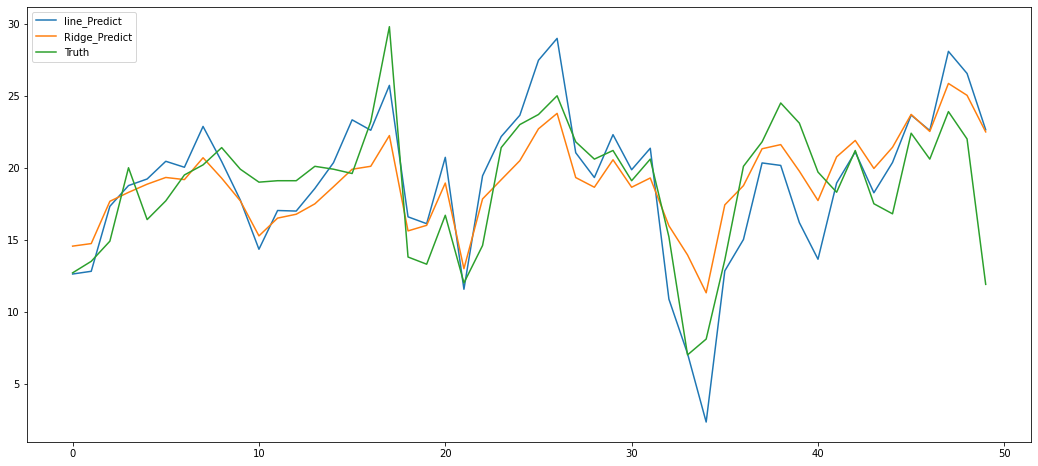

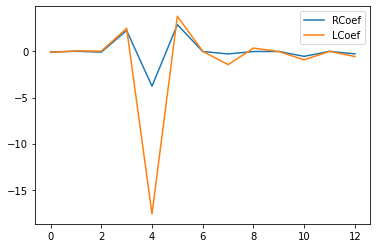

In [4]:
#pipeline = make_pipeline(X_train, y_train)
#scores = cross_val_score(pipeline,X=X_train, y=y_train, cv=10,n_jobs=1)

kf = KFold(n_splits=10, random_state=None) # 10折
#10折划分训练集测试集
for train_index, test_index in kf.split(X):
      
      X_train, X_test = X.loc[train_index], X.loc[test_index] 
      y_train, y_test = y.loc[train_index], y.loc[test_index] 
      

      #线性回归模型
      linear_model = LinearRegression(normalize=True,n_jobs=-1)
      linear_model.fit(X_train, y_train)
    
      # 岭回归模型
      Ridge_model = RidgeCV(alphas=1,normalize=True)
      Ridge_model.fit(X_train, y_train)
    
#线性回归模型
Lcoef = linear_model.coef_#回归系数
line_pre = linear_model.predict(X_test)
print('Linear:')
print('SCORE:{:.4f}'.format(linear_model.score(X_test, y_test)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line_pre))))
print('coef:',Lcoef)

#岭回归模型
Rcoef = Ridge_model.coef_#回归系数
Ridge_pre = Ridge_model.predict(X_test)
print('Ridge:')
print('SCORE:{:.4f}'.format(Ridge_model.score(X_test, y_test)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, Ridge_pre))))
print('coef:',Rcoef)


#拟合情况
hos_pre = pd.DataFrame()
hos_pre['line_Predict'] = line_pre
hos_pre['Ridge_Predict'] = Ridge_pre
hos_pre['Truth'] = y_test.reset_index(drop=True)
hos_pre.plot(figsize=(18,8))

#linear模型、Ridge模型相关系数
df_coef = pd.DataFrame()
df_coef['Title'] = data.columns.delete(-1)
df_coef['RCoef'] = Rcoef
df_coef['LCoef'] = Lcoef
df_coef.plot()


#model = linear_model.RidgeCV(alphas=alphas_to_test, store_cv_values=True)
#model.fit(X,y)


(506, 1)
387.6627741083395


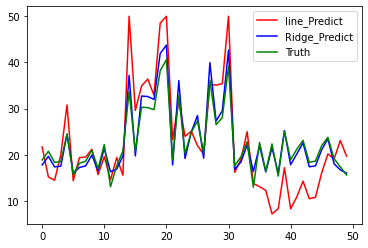

In [9]:
z = np.array(data['RM']).reshape(-1,1)
w = np.array(data['MEDV']).reshape(-1,1)
print(z.shape)

KF=KFold(n_splits=10, shuffle=True)
poly = PolynomialFeatures(degree = 4)
poly.fit(z)
z_poly = poly.transform(z)
loss = 0
for train_index,test_index in KF.split(z_poly):
    z_found,z_exam=z_poly[train_index],z_poly[test_index]
    w_found,w_exam=w[train_index],w[test_index]
    li = LinearRegression(normalize=True,n_jobs=-1)
    li.fit(z_found,w_found)
    w_pred = li.predict(z_exam)
    lg = RidgeCV(normalize=True)
    lg.fit(z_found, w_found)
    w_train = lg.predict(z_exam)
    loss = loss + mean_squared_error(w_exam, w_pred)

print(loss)

t = np.arange(len(X_test))
s = np.arange(len(z_exam))
plt.plot(s, w_exam, 'r',label='line_Predict')
plt.plot(s, w_pred, 'b',label='Ridge_Predict')
plt.plot(s, w_train, 'g',label='Truth')

# 设置图例
plt.legend(loc='upper right')
plt.show()


